In [15]:
### Simulation of an arrival process with arrival rate lambda(t), 0<t<T
import numpy as np
import pandas as pd
import torch
import datetime as dt
import seaborn
import pickle
import matplotlib.pyplot as plt
import os
from scipy.stats import kurtosis, multivariate_normal, norm, wasserstein_distance
import seaborn
from visualization_together import plot_QQ, plot_log_tail_distn, calc_and_print_VAR, calc_and_print_W_dist, plot_density

In [16]:
def load_generated_data_diffusion_pareto(datafolder):
    nsample = 1 # number of generated sample

    path = './save/'+datafolder+"/generated_outputs_nsample_" + str(nsample) + '.pk' 
    with open(path, 'rb') as f:
        fake_samples,real_samples,all_evalpoint,all_observed,all_observed_time,scaler,mean_scaler = pickle.load( f)

    real_samples=torch.clamp((real_samples * scaler + mean_scaler), min=0) # real data
    fake_samples=torch.clamp((fake_samples.squeeze(1) * scaler + mean_scaler), min=0) # generated data

    fake_samples = real_samples*(1-all_evalpoint)+fake_samples*all_evalpoint # for generated data, replace the condition part by real data

    return real_samples.cpu().numpy(), fake_samples.cpu().numpy()

In [17]:
def load_generated_data_diffusion_vectorAR(datafolder):
    nsample = 1 # number of generated sample

    path = './save/'+datafolder+"/generated_outputs_nsample_" + str(nsample) + '.pk' 
    with open(path, 'rb') as f:
        fake_samples,real_samples,all_evalpoint,all_observed,all_observed_time,scaler,mean_scaler = pickle.load( f)

    real_samples = real_samples * scaler + mean_scaler # real data
    fake_samples = fake_samples.squeeze(1) * scaler + mean_scaler # generated data

    fake_samples = real_samples*(1-all_evalpoint)+fake_samples*all_evalpoint # for generated data, replace the condition part by real data

    return real_samples.cpu().numpy(), fake_samples.cpu().numpy()

In [18]:
def load_generated_data_diffusion_queue(datafolder):
    nsample = 1 # number of generated sample

    path = './save/'+datafolder+"/generated_outputs_nsample_" + str(nsample) + '.pk' 
    with open(path, 'rb') as f:
        fake_samples,real_samples,all_evalpoint,all_observed,all_observed_time,scaler,mean_scaler = pickle.load( f)

    real_samples=torch.round(torch.clamp((real_samples * scaler + mean_scaler), min=0)) # real data
    fake_samples=torch.round(torch.clamp((fake_samples.squeeze(1) * scaler + mean_scaler), min=0)) # generated data

    fake_samples = real_samples*(1-all_evalpoint)+fake_samples*all_evalpoint # for generated data, replace the condition part by real data

    return real_samples.cpu().numpy(), fake_samples.cpu().numpy()

In [19]:
def load_generated_data_diffusion_bike(datafolder):
    nsample = 1 # number of generated sample

    path = './save/'+datafolder+"/generated_outputs_nsample_" + str(nsample) + '.pk' 
    with open(path, 'rb') as f:
        fake_samples,real_samples,all_evalpoint,all_observed,all_observed_time,scaler,mean_scaler = pickle.load(f)

    real_samples=(real_samples * scaler + mean_scaler) # real data
    fake_samples=(fake_samples.squeeze(1) * scaler + mean_scaler) # generated data
    fake_samples = real_samples*(1-all_evalpoint)+fake_samples*all_evalpoint # for generated data, replace the condition part by real data
    
    return real_samples.cpu().numpy(), fake_samples.cpu().numpy()

In [20]:
def load_generated_data_diffusion_stock(datafolder):
    nsample = 1 # number of generated sample

    path = './save/'+datafolder+"/generated_outputs_nsample_" + str(nsample) + '.pk' 
    with open(path, 'rb') as f:
        fake_samples,real_samples,all_evalpoint,all_observed,all_observed_time,scaler,mean_scaler = pickle.load( f)

    real_samples=(real_samples * scaler + mean_scaler) # real data
    fake_samples=(fake_samples.squeeze(1) * scaler + mean_scaler) # generated data
    fake_samples = real_samples*(1-all_evalpoint)+fake_samples*all_evalpoint # for generated data, replace the condition part by real data
    return real_samples.cpu().numpy(), fake_samples.cpu().numpy()

### pareto

In [21]:
fake_samples_pareto = {}
real_samples_pareto, fake_samples_pareto["SHD (student-t noise)"] = load_generated_data_diffusion_pareto("pareto_t")
_, fake_samples_pareto["SGM (Gaussian noise)"] = load_generated_data_diffusion_pareto("pareto_gaussian")

fake_samples_pareto["DDPM (Gaussian)"] = np.load("save/baseline_generated_pareto/pareto_ddpm_gaussian.npy")
fake_samples_pareto["LIM"] = np.load("save/baseline_generated_pareto/pareto_LIM.npy")

fake_samples_pareto["CRNNGAN"] = np.load("save/baseline_generated_pareto/pareto_CRNNGAN.npy")
fake_samples_pareto["RGAN"] = np.load("save/baseline_generated_pareto/pareto_RGAN.npy")
fake_samples_pareto["TimeGAN"] = np.load("save/baseline_generated_pareto/pareto_TimeGAN.npy")

In [22]:
# print MAPE VAR
VAR_dict = calc_and_print_VAR(fake_samples_pareto, real_samples_pareto, "plot_result", level_list=[0.95, 0.99, 0.995], target_dim = [i for i in range(0,10)])
for key, value in VAR_dict.items():
    if "err" in key:
        print(key, value)

SHD (student-t noise)_VAR_mean_abs_err {0.95: np.float32(0.16587338), 0.99: np.float32(0.16761683), 0.995: np.float32(0.17731515)}
SGM (Gaussian noise)_VAR_mean_abs_err {0.95: np.float32(0.21564975), 0.99: np.float32(0.26952076), 0.995: np.float32(0.3239425)}
DDPM (Gaussian)_VAR_mean_abs_err {0.95: np.float32(0.32859537), 0.99: np.float32(0.41989818), 0.995: np.float32(0.44309416)}
LIM_VAR_mean_abs_err {0.95: np.float32(0.27468437), 0.99: np.float32(0.3447205), 0.995: np.float32(0.39388976)}
CRNNGAN_VAR_mean_abs_err {0.95: np.float32(0.4979171), 0.99: np.float32(0.6150733), 0.995: np.float32(0.65527135)}
RGAN_VAR_mean_abs_err {0.95: np.float32(0.6752185), 0.99: np.float32(0.8235323), 0.995: np.float32(0.8115057)}
TimeGAN_VAR_mean_abs_err {0.95: np.float32(0.5472529), 0.99: np.float32(0.63305414), 0.995: np.float32(0.66384625)}


In [23]:
# print Wasserstein distance
W_dist_dict = calc_and_print_W_dist(fake_samples_pareto, real_samples_pareto, "plot_result", normalize = True, target_dim = [i for i in range(0,10)])
for key, value in W_dist_dict.items():
    if "W_dist" in key:
        print(key, value)

SHD (student-t noise)_mean_W_dist 0.14259875383632997
SGM (Gaussian noise)_mean_W_dist 0.17806883702228943
DDPM (Gaussian)_mean_W_dist 0.21359877575476588
LIM_mean_W_dist 0.24153532512146234
CRNNGAN_mean_W_dist 0.3067256505986803
RGAN_mean_W_dist 0.7148542350875942
TimeGAN_mean_W_dist 0.5329994280235899


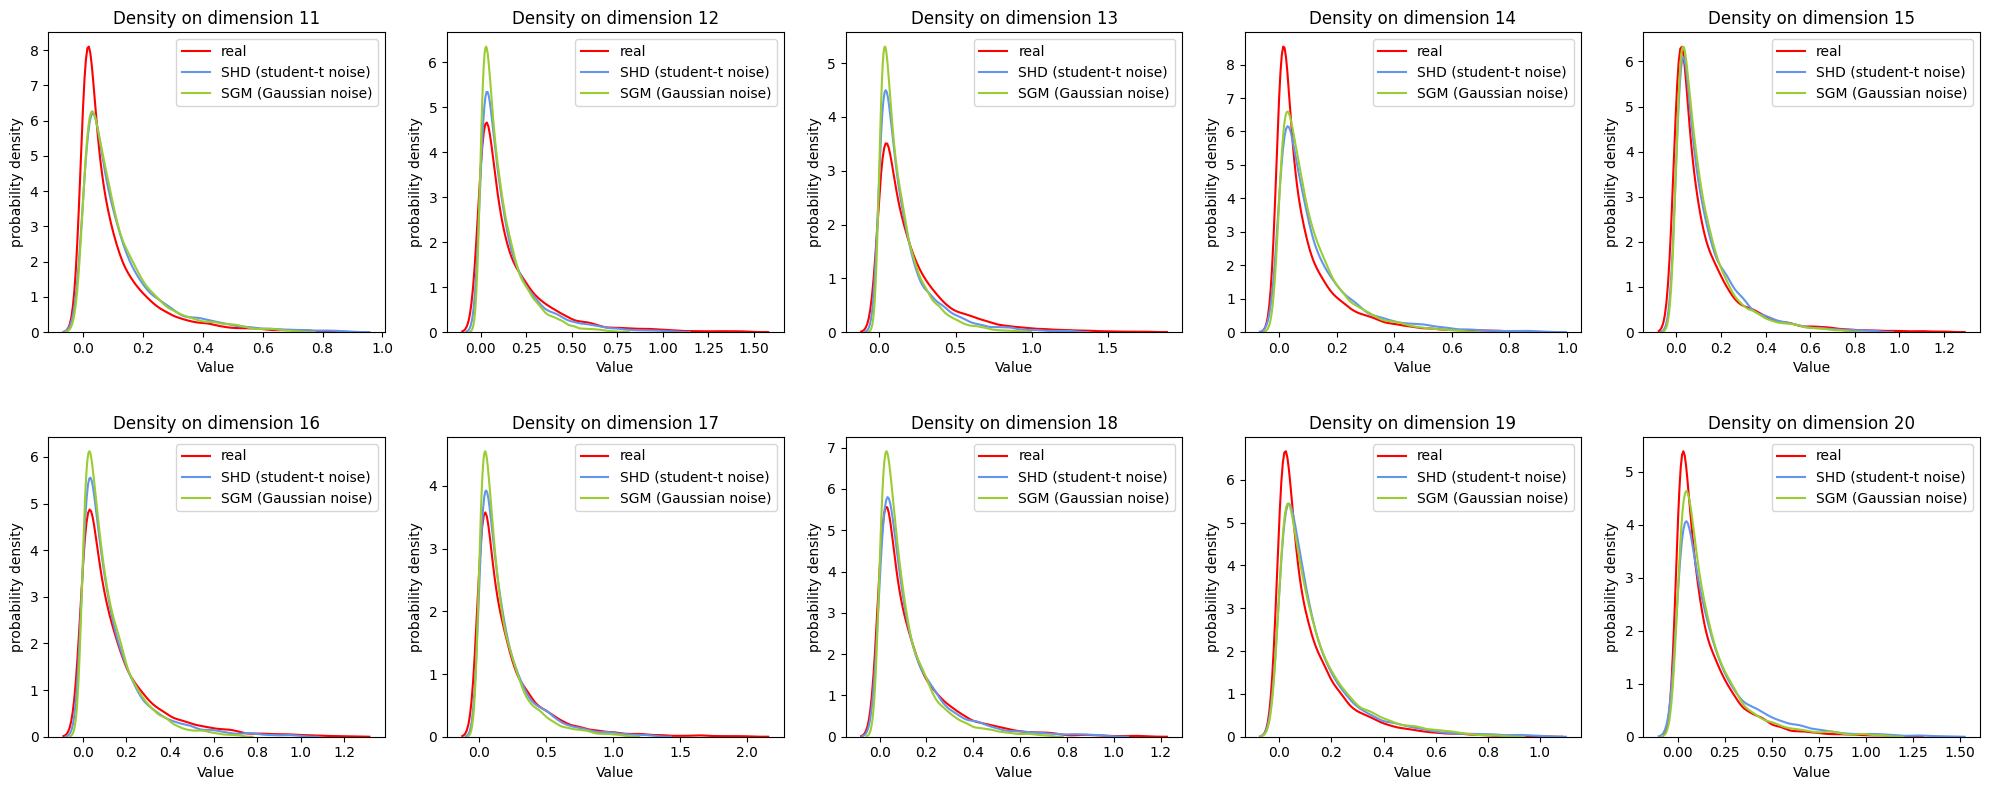

In [24]:
plot_density(["SHD (student-t noise)", "SGM (Gaussian noise)"], fake_samples_pareto, real_samples_pareto, "plot_result", "pareto", target_dim = [i for i in range(10)], color_lis = ['red', 'cornflowerblue','yellowgreen'], shape = (2,5), save_fig = True,  drop_percentile=0.5)

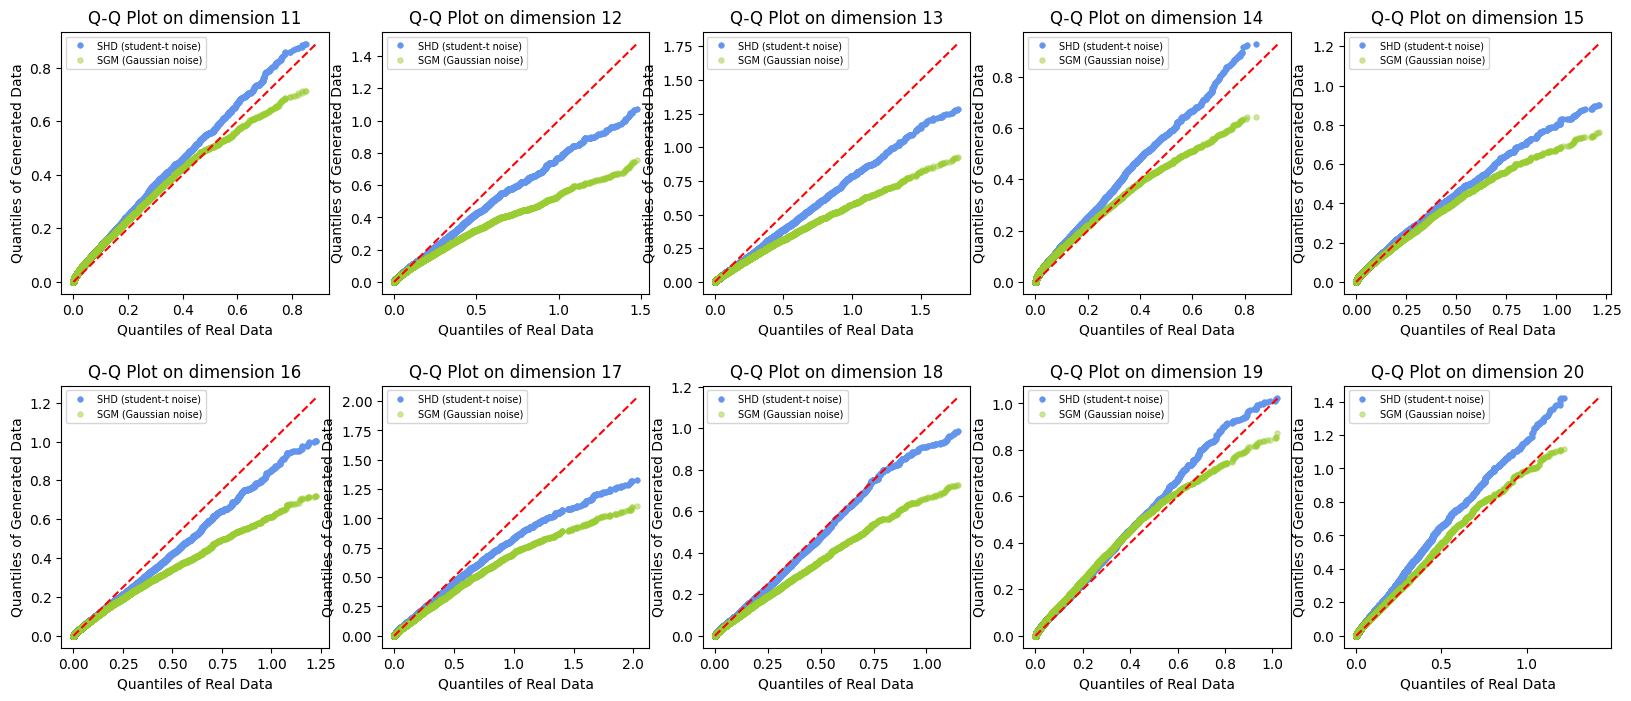

In [25]:
plot_QQ(["SHD (student-t noise)", "SGM (Gaussian noise)"], fake_samples_pareto, real_samples_pareto, "plot_result", "pareto", target_dim = [i for i in range(10)], color_lis = ['cornflowerblue', 'yellowgreen'], shape = (2,5), save_fig = True, drop_percentile=0.5)

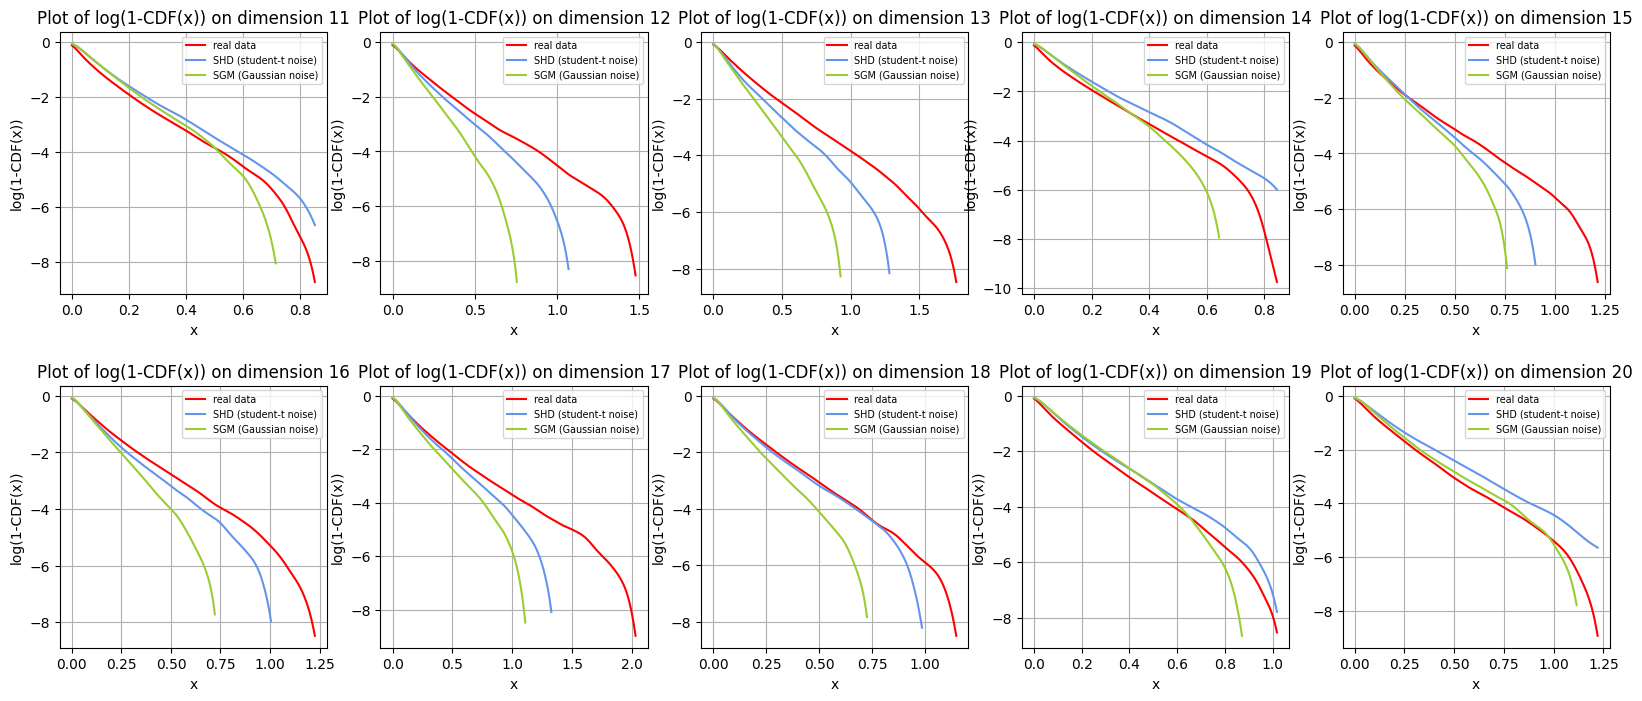

In [26]:
plot_log_tail_distn(["SHD (student-t noise)", "SGM (Gaussian noise)"], fake_samples_pareto, real_samples_pareto, "plot_result", "pareto", target_dim = [i for i in range(10)], color_lis = ['red', 'cornflowerblue','yellowgreen'], shape = (2,5), save_fig = True, drop_percentile=0.5)

### pareto 200d

In [27]:
fake_samples_pareto = {}
real_samples_pareto, fake_samples_pareto["SHD (student-t noise)"] = load_generated_data_diffusion_pareto("pareto_200d_t")
_, fake_samples_pareto["SGM (Gaussian noise)"] = load_generated_data_diffusion_pareto("pareto_200d_gaussian")

fake_samples_pareto["DDPM (Gaussian)"] = np.load("save/baseline_generated_pareto_200d/pareto_ddpm_gaussian_200d.npy")
fake_samples_pareto["LIM"] = np.load("save/baseline_generated_pareto_200d/pareto_LIM_200d.npy")

In [28]:
# print MAPE VAR
VAR_dict = calc_and_print_VAR(fake_samples_pareto, real_samples_pareto, "plot_result", level_list=[0.95, 0.99, 0.995], target_dim = [i for i in range(0,100)])
for key, value in VAR_dict.items():
    if "err" in key:
        print(key, value)

SHD (student-t noise)_VAR_mean_abs_err {0.95: np.float32(0.29899883), 0.99: np.float32(0.30555648), 0.995: np.float32(0.34403545)}
SGM (Gaussian noise)_VAR_mean_abs_err {0.95: np.float32(0.31266686), 0.99: np.float32(0.4127539), 0.995: np.float32(0.48871353)}
DDPM (Gaussian)_VAR_mean_abs_err {0.95: np.float32(0.3888053), 0.99: np.float32(0.43668693), 0.995: np.float32(0.45764458)}
LIM_VAR_mean_abs_err {0.95: np.float32(0.33883014), 0.99: np.float32(0.35499454), 0.995: np.float32(0.37093788)}


In [29]:
# print Wasserstein distance
W_dist_dict = calc_and_print_W_dist(fake_samples_pareto, real_samples_pareto, "plot_result", normalize = True, target_dim = [i for i in range(0,100)])
for key, value in W_dist_dict.items():
    if "W_dist" in key:
        print(key, value)

SHD (student-t noise)_mean_W_dist 0.26108233436441425
SGM (Gaussian noise)_mean_W_dist 0.2724612323608823
DDPM (Gaussian)_mean_W_dist 0.2852480608817853
LIM_mean_W_dist 0.27493778320246676


### vector AR

In [30]:
fake_samples_vectorAR = {}
real_samples_vectorAR, fake_samples_vectorAR["SHD (student-t noise)"] = load_generated_data_diffusion_vectorAR("vectorAR_t")
_, fake_samples_vectorAR["SGM (Gaussian noise)"] = load_generated_data_diffusion_vectorAR("vectorAR_gaussian")

fake_samples_vectorAR["DDPM (Gaussian)"] = np.load("save/baseline_generated_vectorAR/vectorAR_ddpm_gaussian.npy")
fake_samples_vectorAR["LIM"] = np.load("save/baseline_generated_vectorAR/vectorAR_LIM.npy")

In [31]:
# print MAPE VAR
VAR_dict = calc_and_print_VAR(fake_samples_vectorAR, real_samples_vectorAR, "plot_result", level_list=[0.95, 0.99, 0.995], target_dim = [i for i in range(0,3)], target_L = [i for i in range(5,10)])
for key, value in VAR_dict.items():
    if "err" in key:
        print(key, value)

SHD (student-t noise)_VAR_mean_abs_err {0.95: np.float32(0.091604315), 0.99: np.float32(0.15008703), 0.995: np.float32(0.16180056)}
SGM (Gaussian noise)_VAR_mean_abs_err {0.95: np.float32(0.19867297), 0.99: np.float32(0.29524326), 0.995: np.float32(0.32854334)}
DDPM (Gaussian)_VAR_mean_abs_err {0.95: np.float32(0.19612323), 0.99: np.float32(0.24993058), 0.995: np.float32(0.27169335)}
LIM_VAR_mean_abs_err {0.95: np.float32(0.3659631), 0.99: np.float32(0.21929756), 0.995: np.float32(0.24124235)}


In [32]:
# print Wasserstein distance
W_dist_dict = calc_and_print_W_dist(fake_samples_vectorAR, real_samples_vectorAR, "plot_result", normalize = True,  target_dim = [i for i in range(0,3)], target_L = [i for i in range(5,10)])
for key, value in W_dist_dict.items():
    if "W_dist" in key:
        print(key, value)

SHD (student-t noise)_mean_W_dist 0.3473265140462949
SGM (Gaussian noise)_mean_W_dist 0.3740796999644745
DDPM (Gaussian)_mean_W_dist 0.4166548809426753
LIM_mean_W_dist 0.5523948981970085


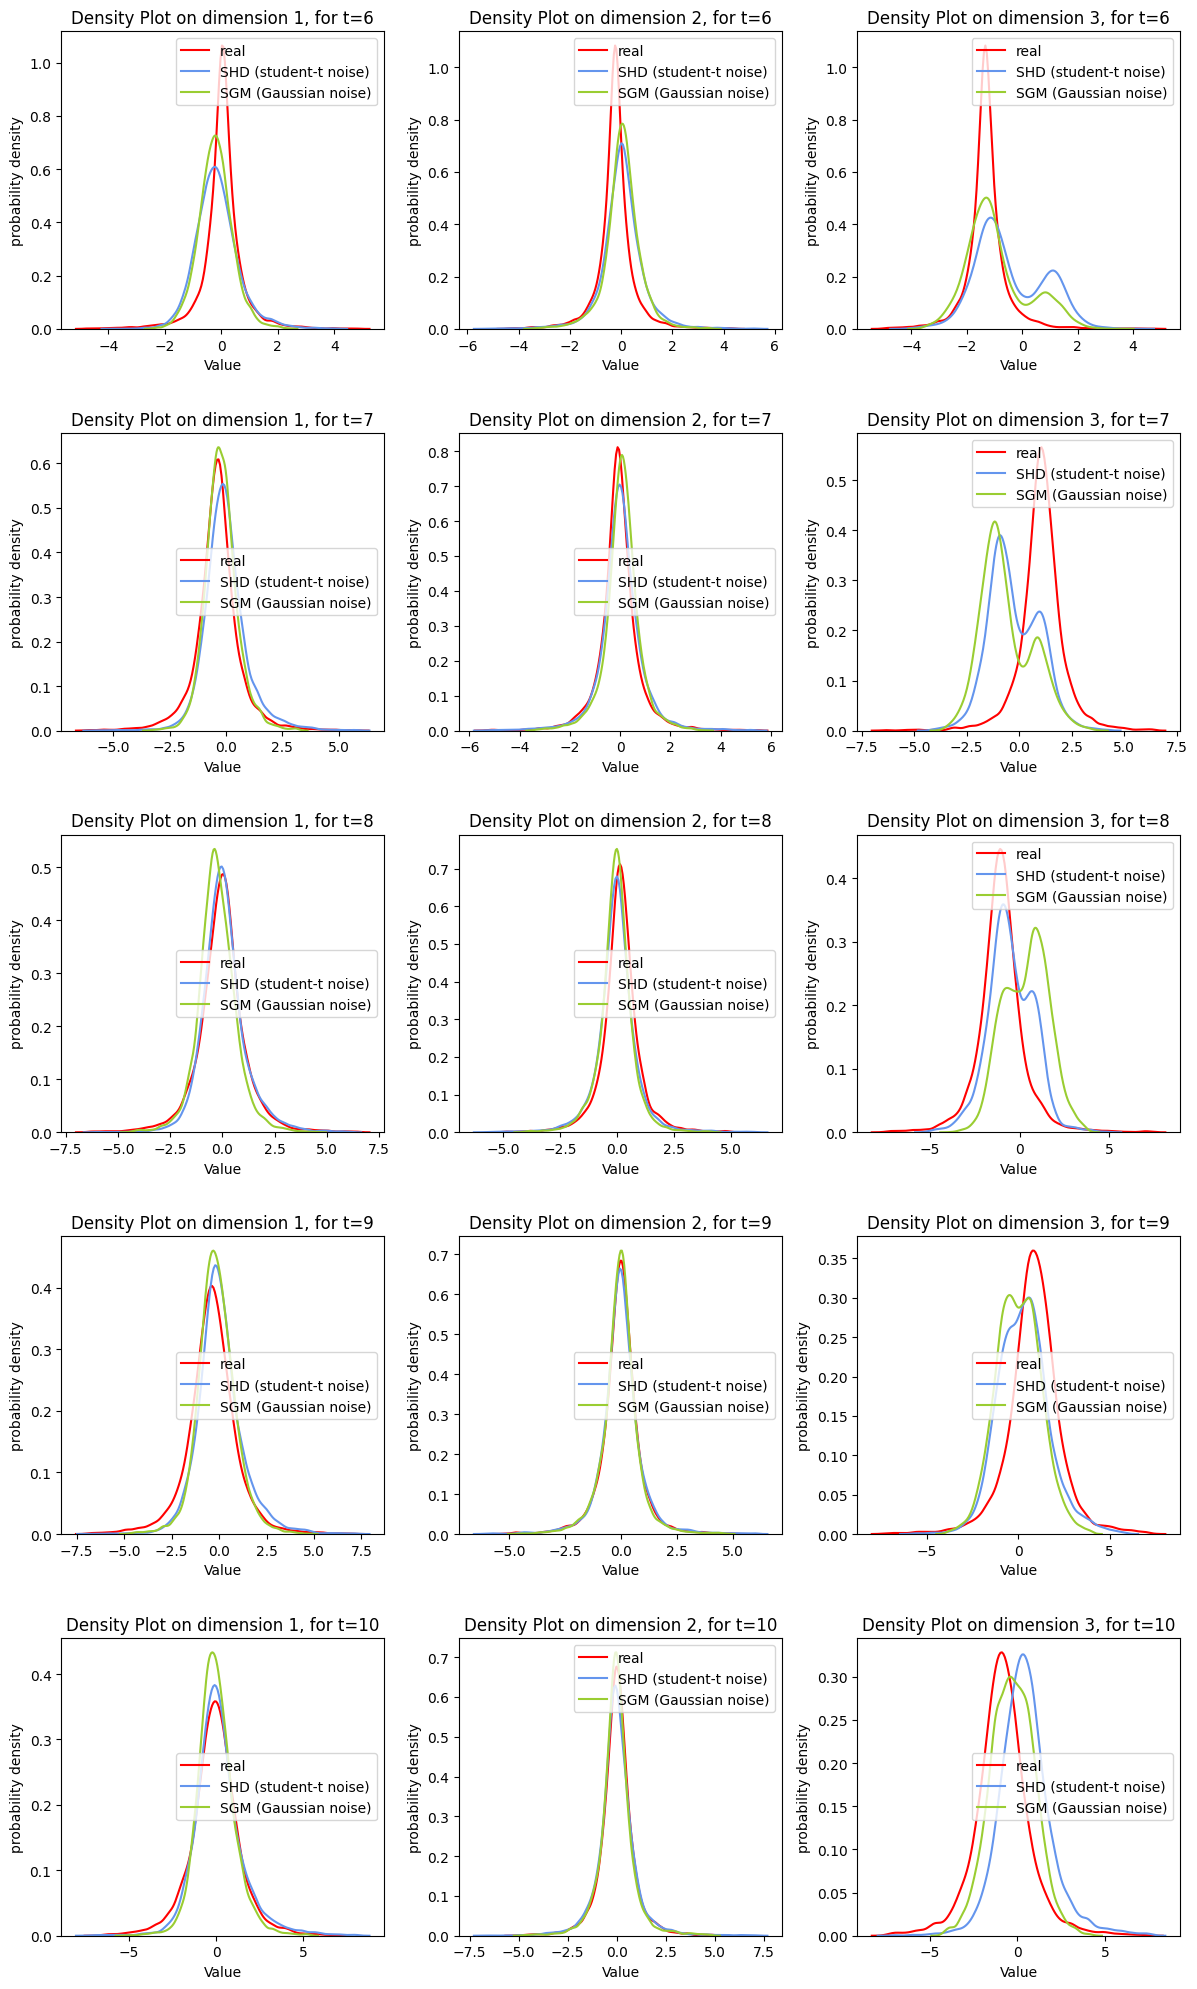

In [33]:
plot_density(["SHD (student-t noise)", "SGM (Gaussian noise)"], fake_samples_vectorAR, real_samples_vectorAR, "plot_result", "vectorAR", target_dim = [i for i in range(3)], target_L=[i for i in range(5,10)], color_lis = ['red', 'cornflowerblue','yellowgreen'], shape = (5,3), save_fig = True,  drop_percentile=0.5)

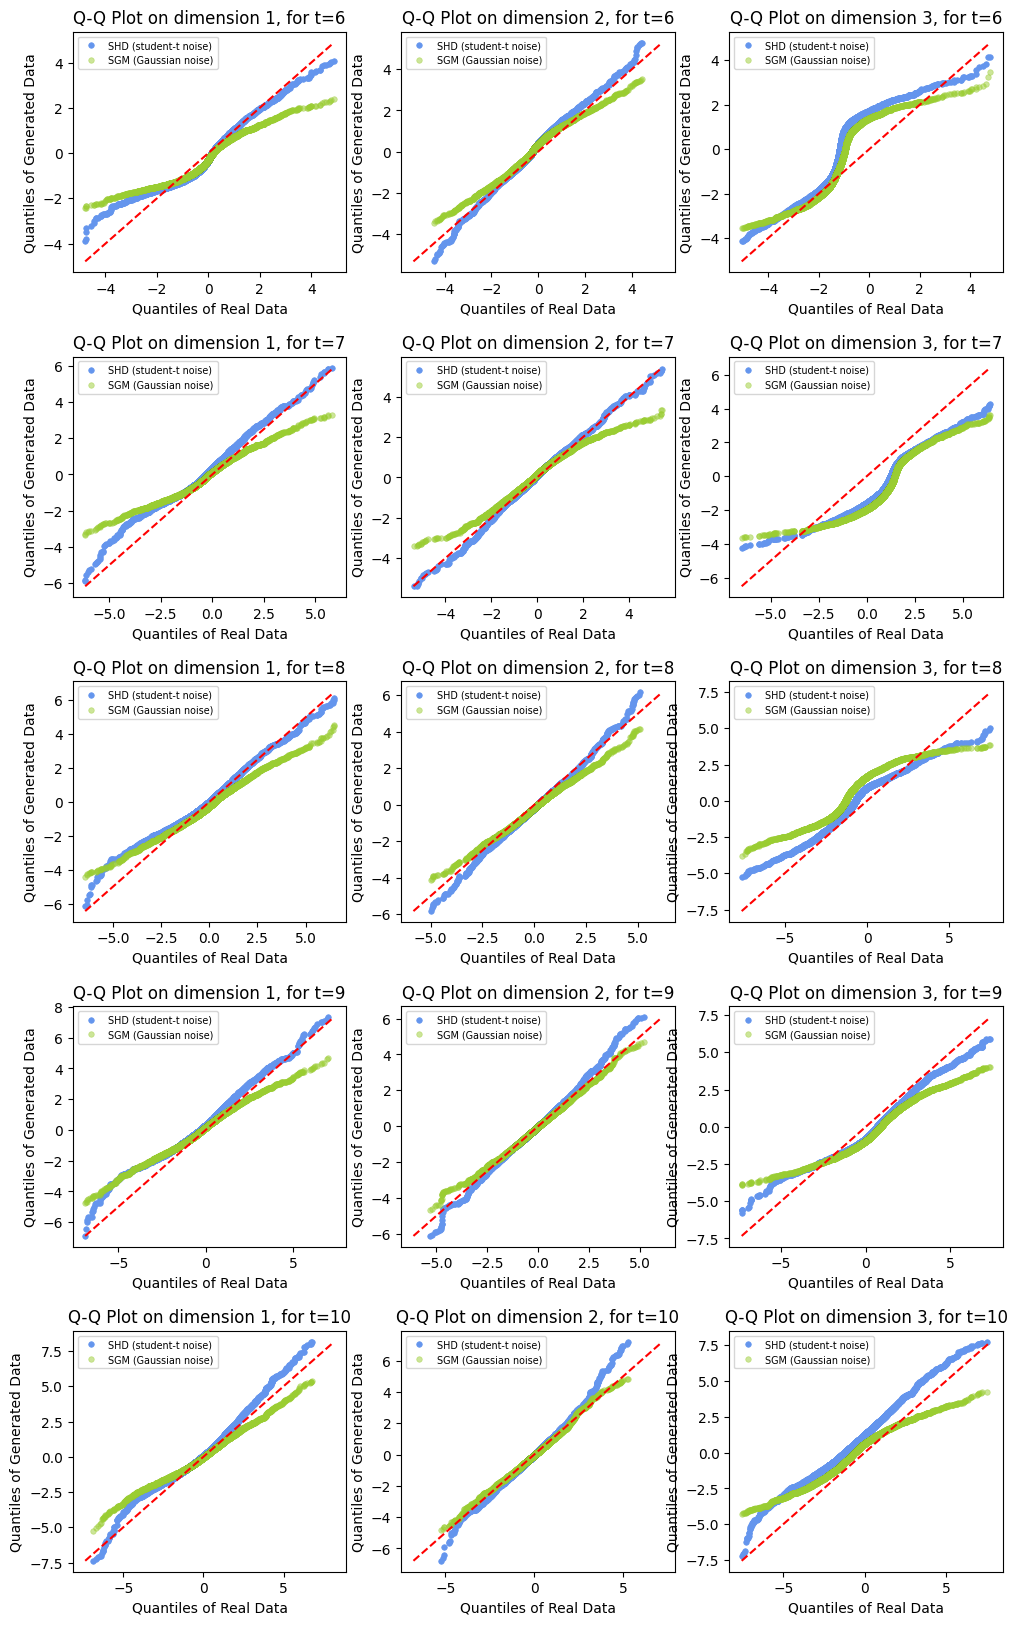

In [34]:
plot_QQ(["SHD (student-t noise)", "SGM (Gaussian noise)"], fake_samples_vectorAR, real_samples_vectorAR, \
        "plot_result", "vectorAR", target_dim = [i for i in range(3)], target_L=[i for i in range(5,10)], \
            color_lis = ['cornflowerblue', 'yellowgreen'], shape = (5,3), save_fig = True, drop_percentile=0.5)

### queue

In [35]:
fake_samples_queue = {}
real_samples_queue, fake_samples_queue["SHD (student-t noise)"] = load_generated_data_diffusion_queue("queueing_t")
_, fake_samples_queue["SGM (Gaussian noise)"] = load_generated_data_diffusion_queue("queueing_gaussian")

fake_samples_queue["DDPM (Gaussian)"] = np.load("save/baseline_generated_queue/queue_ddpm_gaussian.npy")
fake_samples_queue["LIM"] = np.load("save/baseline_generated_queue/queue_LIM.npy")

In [36]:
VAR_dict = calc_and_print_VAR(fake_samples_queue, real_samples_queue, "plot_result", level_list=[0.95, 0.99, 0.995], target_dim = [i for i in range(0,20)])
for key, value in VAR_dict.items():
    if "err" in key:
        print(key, value)

SHD (student-t noise)_VAR_mean_abs_err {0.95: np.float32(0.09202598), 0.99: np.float32(0.08048216), 0.995: np.float32(0.11221607)}
SGM (Gaussian noise)_VAR_mean_abs_err {0.95: np.float32(0.20167224), 0.99: np.float32(0.1517382), 0.995: np.float32(0.17741168)}
DDPM (Gaussian)_VAR_mean_abs_err {0.95: np.float32(0.1285751), 0.99: np.float32(0.13532618), 0.995: np.float32(0.17212376)}
LIM_VAR_mean_abs_err {0.95: np.float32(0.16644362), 0.99: np.float32(0.16218244), 0.995: np.float32(0.17430481)}


In [37]:
W_dist_dict = calc_and_print_W_dist(fake_samples_queue, real_samples_queue, "plot_result", normalize = True, target_dim = [i for i in range(0,20)])
for key, value in W_dist_dict.items():
    if "W_dist" in key:
        print(key, value)

SHD (student-t noise)_mean_W_dist 0.14330792873866358
SGM (Gaussian noise)_mean_W_dist 0.2844748703401161
DDPM (Gaussian)_mean_W_dist 0.19410673919771215
LIM_mean_W_dist 0.6768798083370104


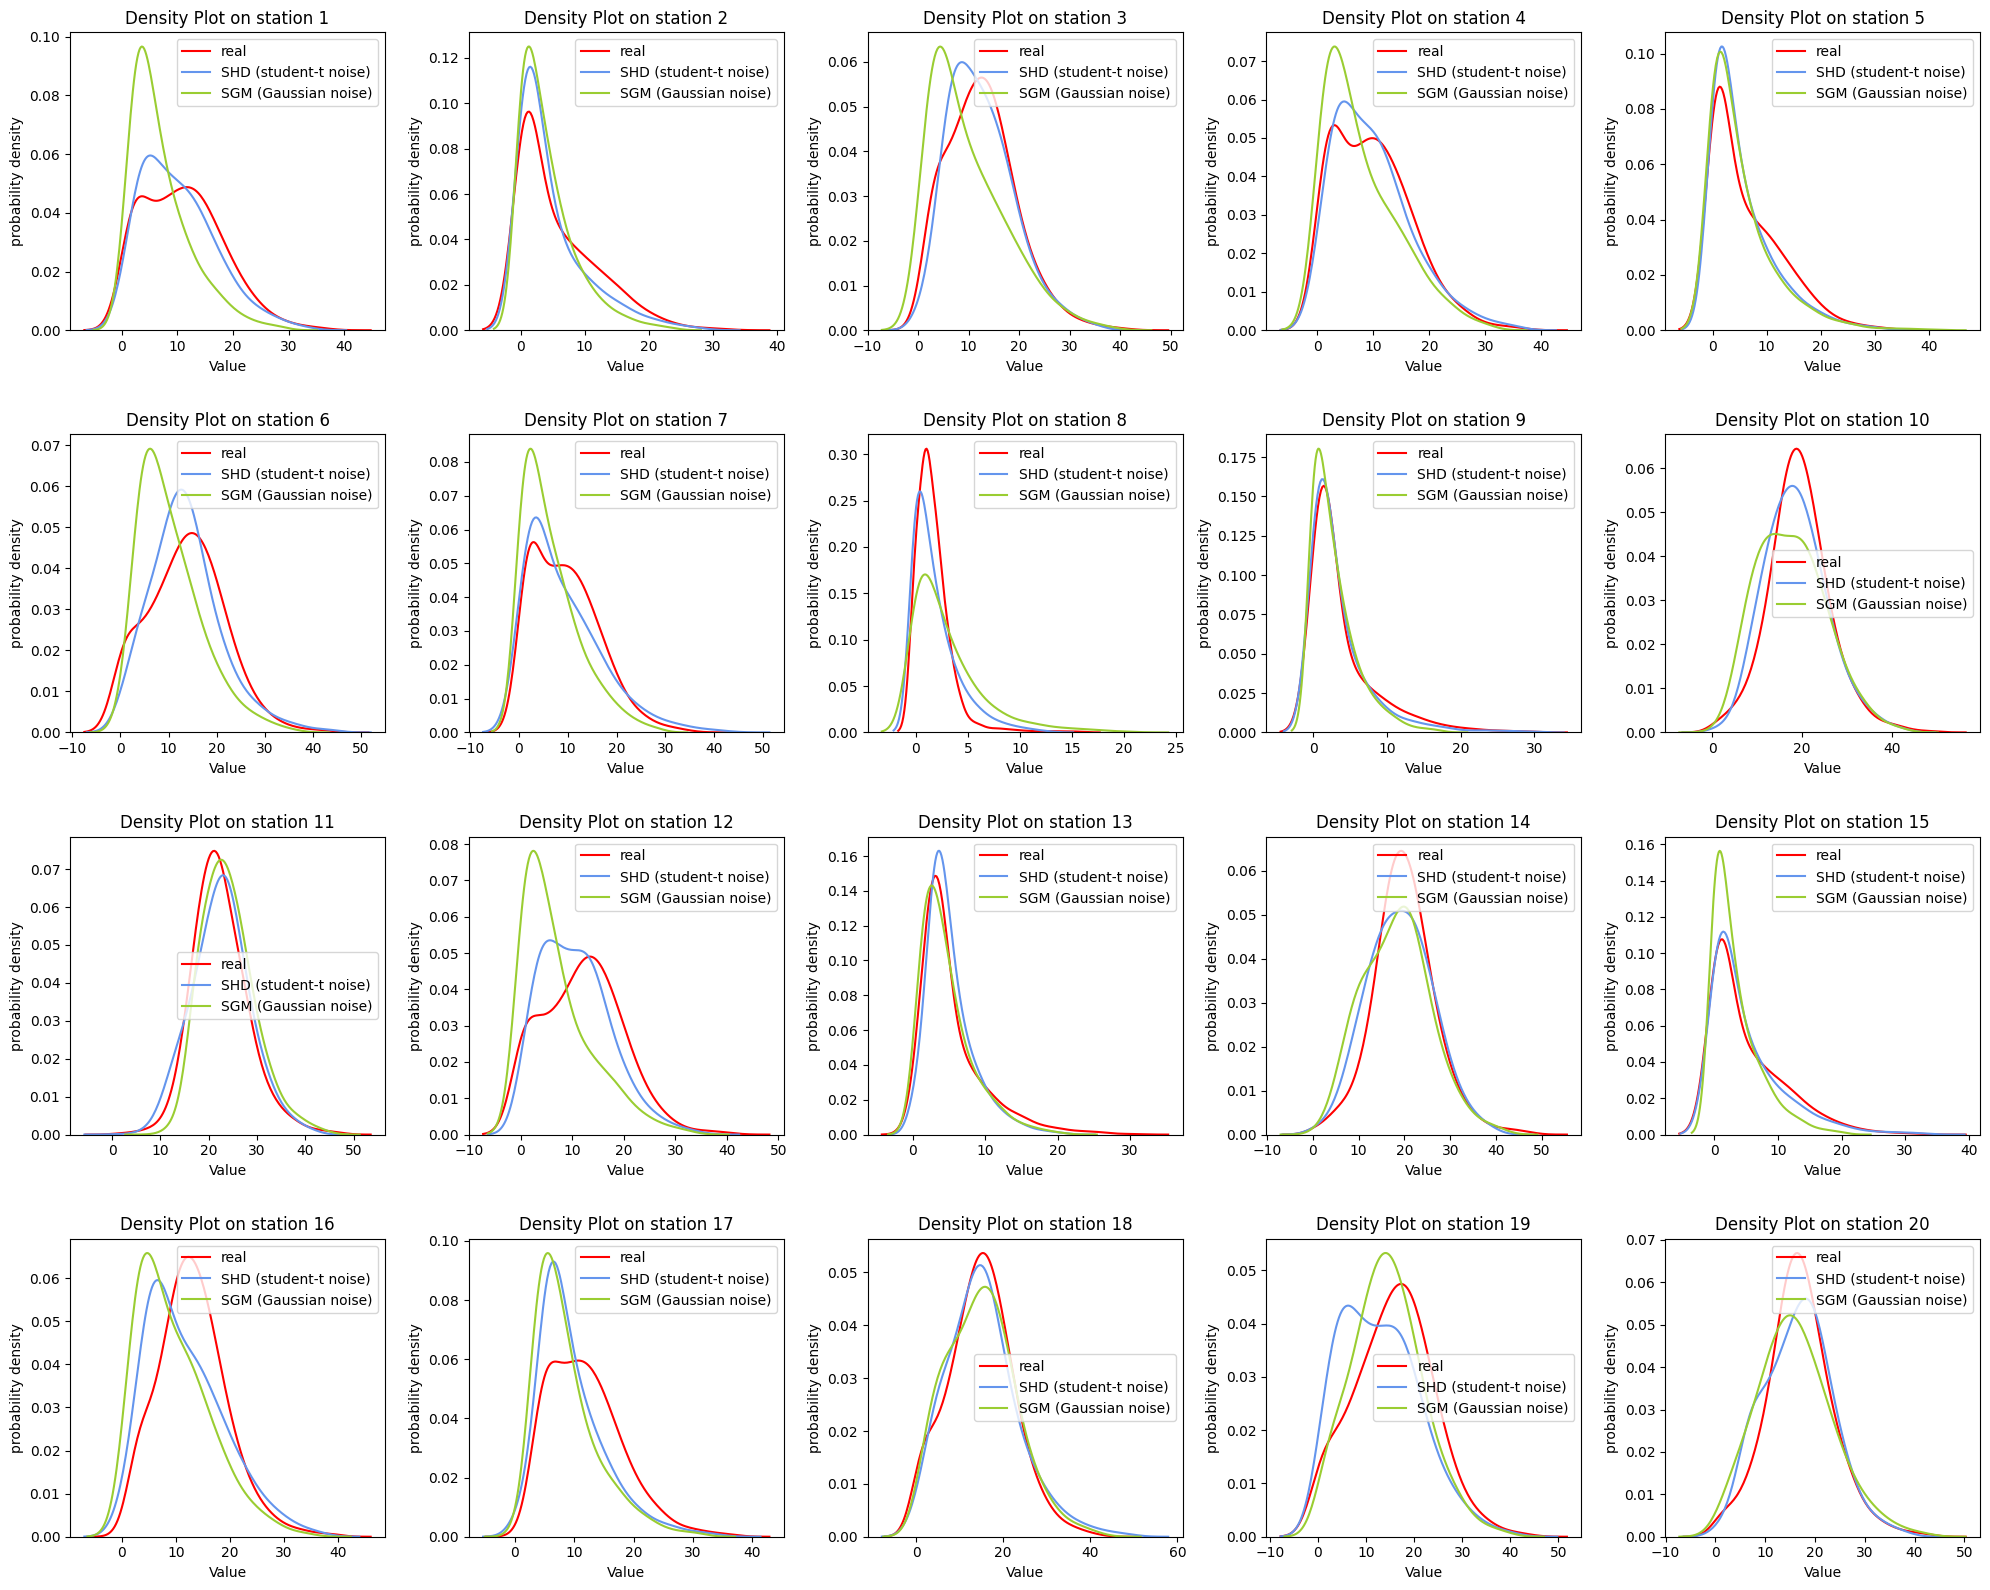

In [38]:
plot_density(["SHD (student-t noise)", "SGM (Gaussian noise)"], fake_samples_queue, real_samples_queue, "plot_result", "queue", target_dim = [i for i in range(20)], color_lis = ['red', 'cornflowerblue','yellowgreen'], shape = (4,5), save_fig = True, drop_percentile=0.5, bw_adjust=2.0)

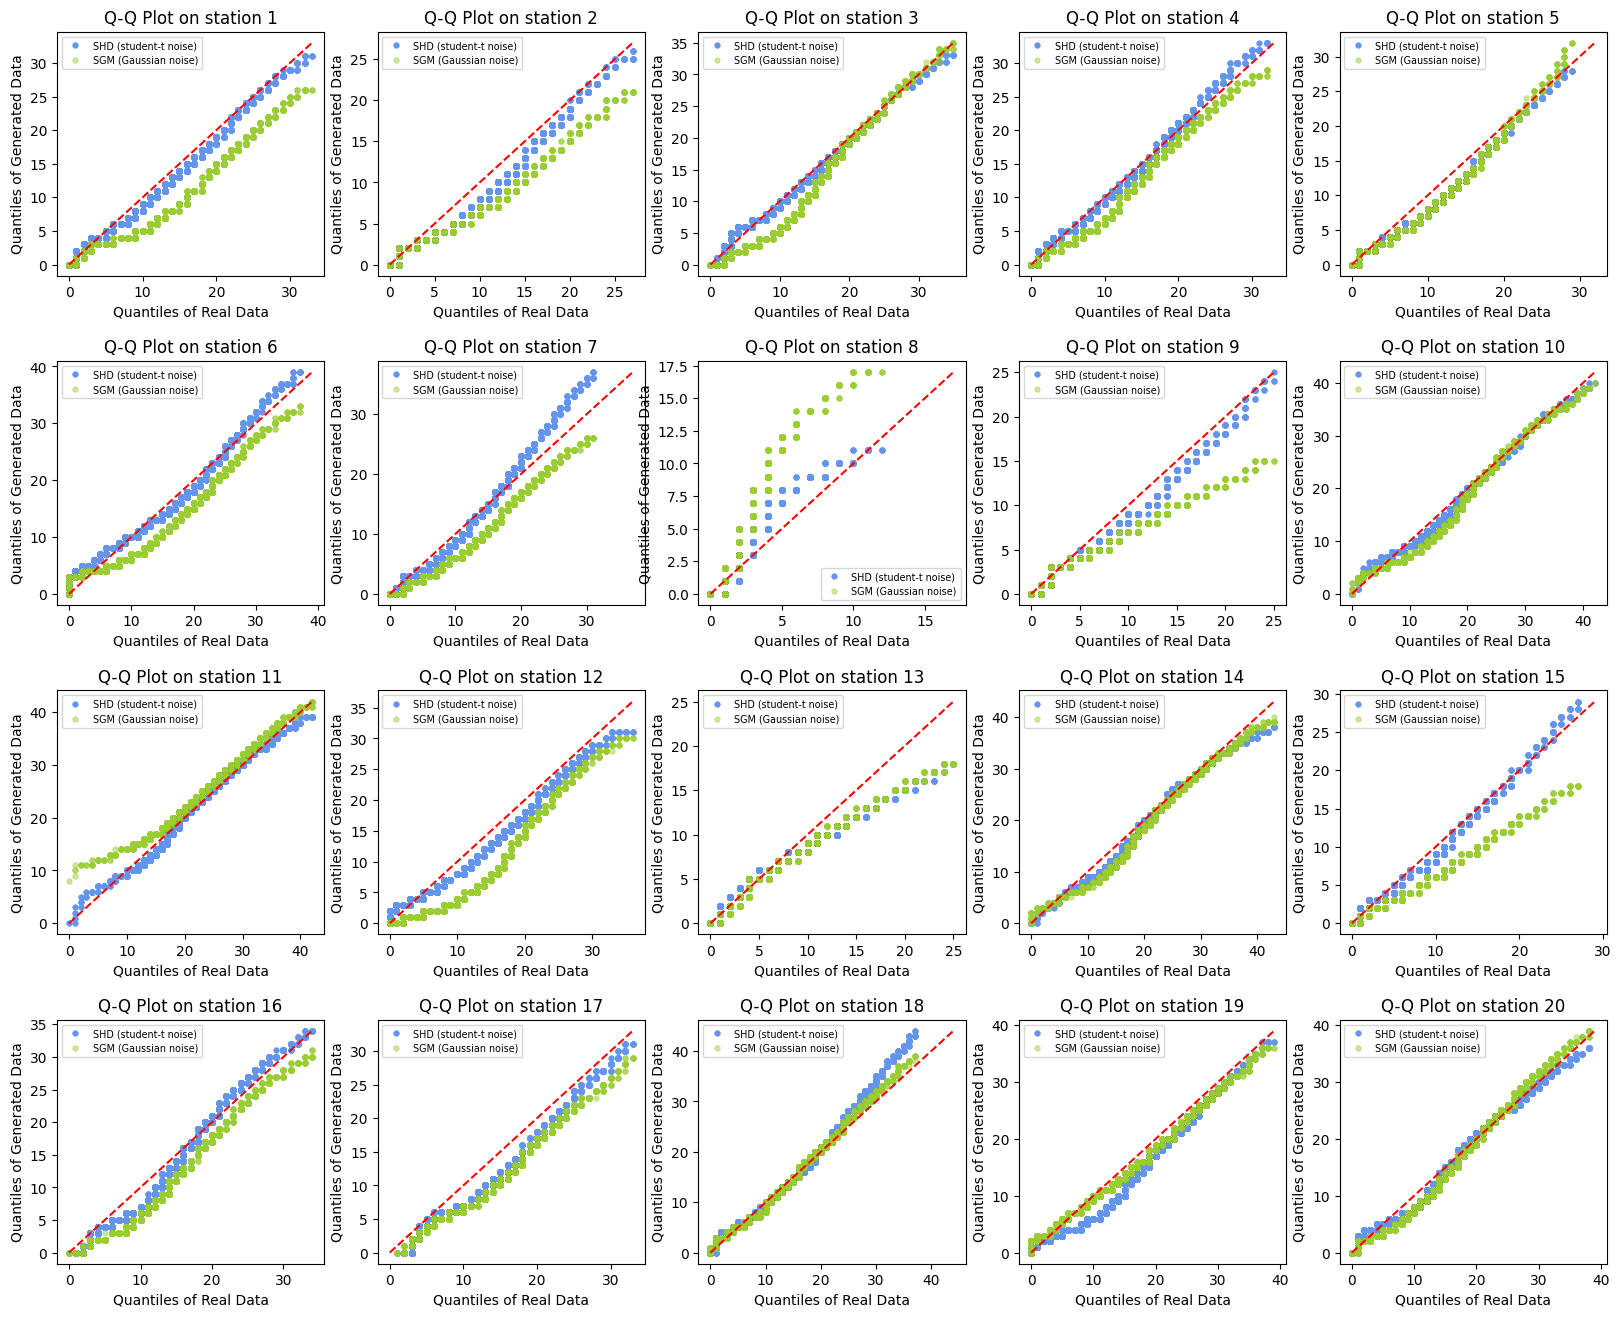

In [39]:
plot_QQ(["SHD (student-t noise)", "SGM (Gaussian noise)"], fake_samples_queue, real_samples_queue, "plot_result", "queue", target_dim = [i for i in range(20)], color_lis = ['cornflowerblue', 'yellowgreen'], shape=(4,5), drop_percentile=1.0, save_fig = False)

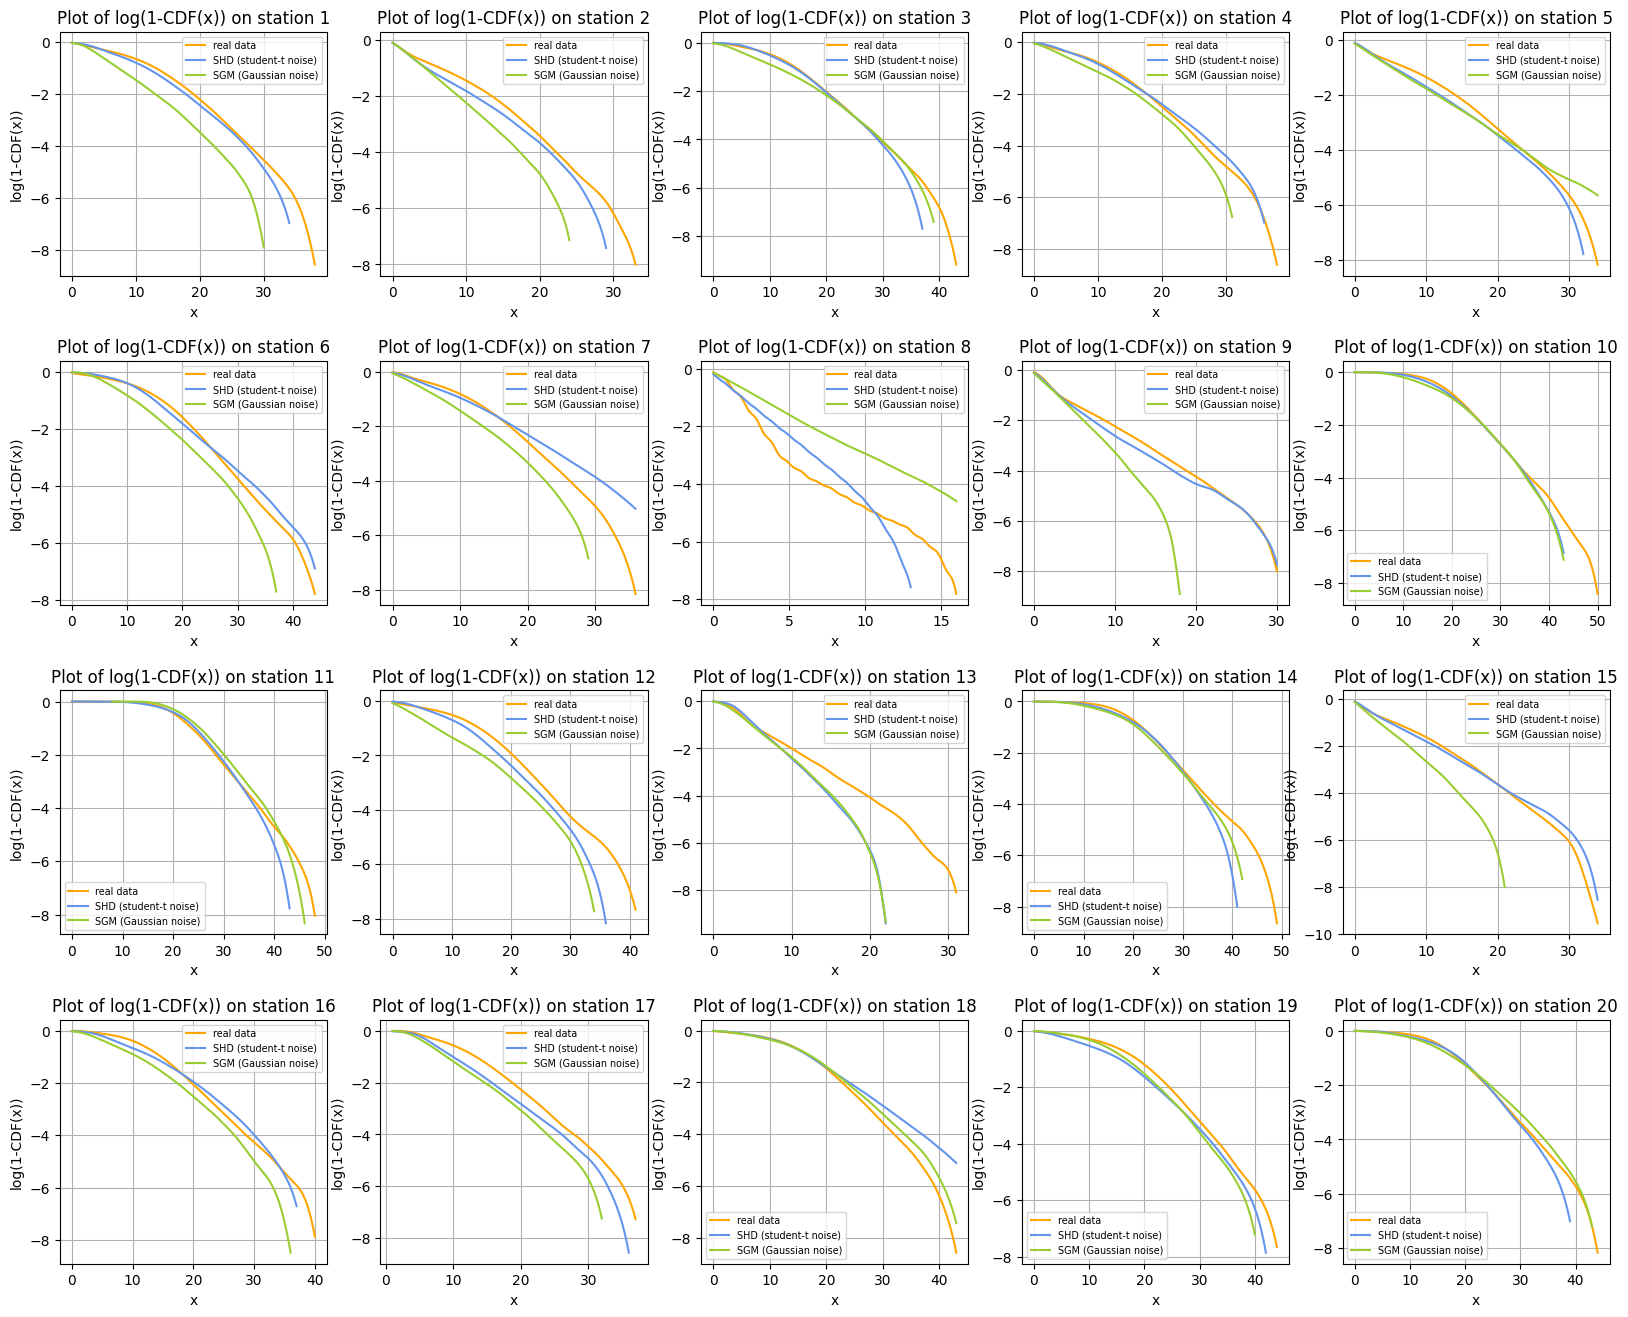

In [40]:
plot_log_tail_distn(["SHD (student-t noise)", "SGM (Gaussian noise)"], fake_samples_queue, real_samples_queue, "plot_result", "queue", target_dim = [i for i in range(20)], color_lis = ['orange', 'cornflowerblue', 'yellowgreen'], shape=(4,5), save_fig = False)

### bike

In [41]:
def quantile_loss(target, forecast, q: float, eval_points) -> float:
    return 2 * torch.sum(
        abs((forecast - target) * eval_points * ((target <= forecast) * 1.0 - q))
    )


def calc_denominator(target, eval_points):
    return torch.sum(torch.abs(target * eval_points))


def calc_quantile_CRPS(target, forecast, eval_points, mean_scaler=0, scaler=1):

    target = target * scaler + mean_scaler
    forecast = forecast * scaler + mean_scaler

    quantiles = np.arange(0.05, 1.0, 0.05)
    denom = calc_denominator(target, eval_points)
    CRPS = 0
    for i in range(len(quantiles)):
        q_pred = []
        for j in range(len(forecast)):
            q_pred.append(torch.quantile(forecast[j:j+1], quantiles[i], dim=1))
        q_pred = torch.cat(q_pred, 0)
        q_loss = quantile_loss(target, q_pred, quantiles[i], eval_points)
        CRPS += q_loss / denom
    return CRPS.item() / len(quantiles)

In [42]:
fake_samples_bike = {}
real_samples_bike, fake_samples_bike["SHD (student-t noise)"] = load_generated_data_diffusion_queue("bike_t")
_, fake_samples_bike["SGM (Gaussian noise)"] = load_generated_data_diffusion_queue("bike_gaussian")

fake_samples_bike["DDPM (Gaussian)"] = np.load("save/baseline_generated_bike/bike_ddpm_gaussian.npy")
fake_samples_bike["LIM"] = np.load("save/baseline_generated_bike/bike_LIM.npy")

In [43]:
pivot_data = pd.read_csv("data/bike/pivot_data.csv",index_col=[0])
real_paths = []
results_dict = {}
for method in fake_samples_bike.keys():
    results_dict[method] = {}
    for starting_value in {tuple(row) for row in real_samples_bike[:,0:12,0]}:

        target_subset = np.array([row for row in real_samples_bike if np.array_equal(np.round(row[0:12,0]), np.round(starting_value))])

        # target_mask = (real_samples[:, 0:12, 0] == starting_value)
        # target_subset = real_samples[target_mask]
        # print(target_subset.shape)
    
        samples = fake_samples_bike[method]
        samples_subset = np.array([row for row in samples if np.array_equal(np.round(row[0:12,0]), np.round(np.array(starting_value)))])

        real_path = []
        quantile_95_path = []
        quantile_75_path = []
        quantile_25_path = []
        quantile_05_path = []
        for time in range(samples_subset.shape[1]):
            real_path.append(target_subset[0][time][0])

            quantile_95_path.append(np.percentile(samples_subset[:,time,0],95))
            quantile_75_path.append(np.percentile(samples_subset[:,time,0],75))
            quantile_25_path.append(np.percentile(samples_subset[:,time,0],25))
            quantile_05_path.append(np.percentile(samples_subset[:,time,0],5))

        # find today's date
        
        target_series = pd.Series(np.array(real_path), index=pivot_data.columns)

        # Find the row(s) where all values match the target
        matches = (abs(pivot_data - target_series)<0.1).all(axis=1)

        # Get the index of matching row(s)
        matching_indexes = matches[matches].index.tolist()
        today = matching_indexes[0]

        
        results_dict[method][today] = {"real_path":real_path, "fake_paths":samples_subset, "quantile_05_path":quantile_05_path, "quantile_25_path":quantile_25_path,\
                           "quantile_75_path":quantile_75_path, "quantile_95_path":quantile_95_path}
        


In [44]:
weekday_list = []
weekend_list = []
for today in results_dict[method].keys():
    if dt.datetime.strptime(today, "%Y-%m-%d").strftime("%A") in ["Saturday", "Sunday"]:
        weekend_list.append(today)
    else:
        weekday_list.append(today)

In [45]:
CRPS_all = {}
CRPS_weekday = {}
CRPS_weekend = {}

for method in results_dict.keys():
    CRPS_all[method]=[]
    CRPS_weekday[method]=[]
    CRPS_weekend[method]=[]
    for today in results_dict[method].keys():
        real = torch.tensor(results_dict[method][today]["real_path"])
        fake = torch.tensor(results_dict[method][today]["fake_paths"]).reshape(-1,24).T
        CRPS = calc_quantile_CRPS(real,fake,torch.tensor([0 for i in range(12)]+[1 for i in range(12)]))
        CRPS_all[method].append(CRPS)
        if today in weekday_list:
            CRPS_weekday[method].append(CRPS)
        elif today in weekend_list:
            CRPS_weekend[method].append(CRPS)


In [46]:
for key in CRPS_all.keys():
    print(key," CRPS_all: ",np.array(CRPS_all[key]).mean()," CRPS_weekday: ",np.array(CRPS_weekday[key]).mean(),\
        " CRPS_weekend: ",np.array(CRPS_weekend[key]).mean())

SHD (student-t noise)  CRPS_all:  0.12706185238701956  CRPS_weekday:  0.11845146912580347  CRPS_weekend:  0.14256054225720857
SGM (Gaussian noise)  CRPS_all:  0.1589169058584629  CRPS_weekday:  0.1224536763297187  CRPS_weekend:  0.22455071901020252
DDPM (Gaussian)  CRPS_all:  0.17440025878131835  CRPS_weekday:  0.13644709642867595  CRPS_weekend:  0.2427159510160747
LIM  CRPS_all:  0.2832762890292289  CRPS_weekday:  0.2694171771668551  CRPS_weekend:  0.30822269038150185


In [47]:
def plot_bike_result(key, results_dict):
    num_dates = len(results_dict[next(iter(results_dict))].items())
    fig, axes = plt.subplots(2, int(num_dates/2), figsize = (4*int(num_dates/2), 4*2))  # Adjust the figsize to fit your screen
    k=0
    axes = np.array(axes).reshape(int(num_dates/2),2)
    color_map = {"SHD (student-t noise)":"green", "SGM (Gaussian noise)":"orange"}
    label_map = {"SHD (student-t noise)":"t", "SGM (Gaussian noise)":"Gaussian"}
    if key not in color_map.keys():
        color_map[key] = "green"
        label_map[key] = key
    for today in results_dict[method].keys():
        ax = axes[k//2,k%2]
        k+=1
        real_path = results_dict[key][today]["real_path"]
        quantile_05_path = results_dict[key][today]["quantile_05_path"]
        quantile_25_path = results_dict[key][today]["quantile_25_path"]
        quantile_75_path = results_dict[key][today]["quantile_75_path"]
        quantile_95_path = results_dict[key][today]["quantile_95_path"]
        time = [f"{'%02d'%i}:00" for i in range(24)]
        ax.fill_between(time, quantile_25_path, quantile_75_path, color=color_map[key], alpha=0.4, label=f'50.0% CI, {label_map[key]} noise')
        ax.fill_between(time, quantile_05_path, quantile_95_path, color=color_map[key], alpha=0.2, label=f'90.0% CI, {label_map[key]} noise')
        
        ax.plot(time, real_path, label = "real_path")
        ax.scatter(time, real_path, color="red", marker="x")

        ax.set_xticks(time[::3])  # Setting x-ticks to show every 2 hours for clarity
        ax.set_xticklabels(time[::3], rotation=45)  # Rotate labels for better readability
        ax.legend()
        
        ax.set_title(today+", "+dt.datetime.strptime(today, "%Y-%m-%d").strftime("%A"))
    plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure area
    plt.savefig(f'save/plot_result/bike_rental_plot_{label_map[key]}_{num_dates}.png')
    plt.show()


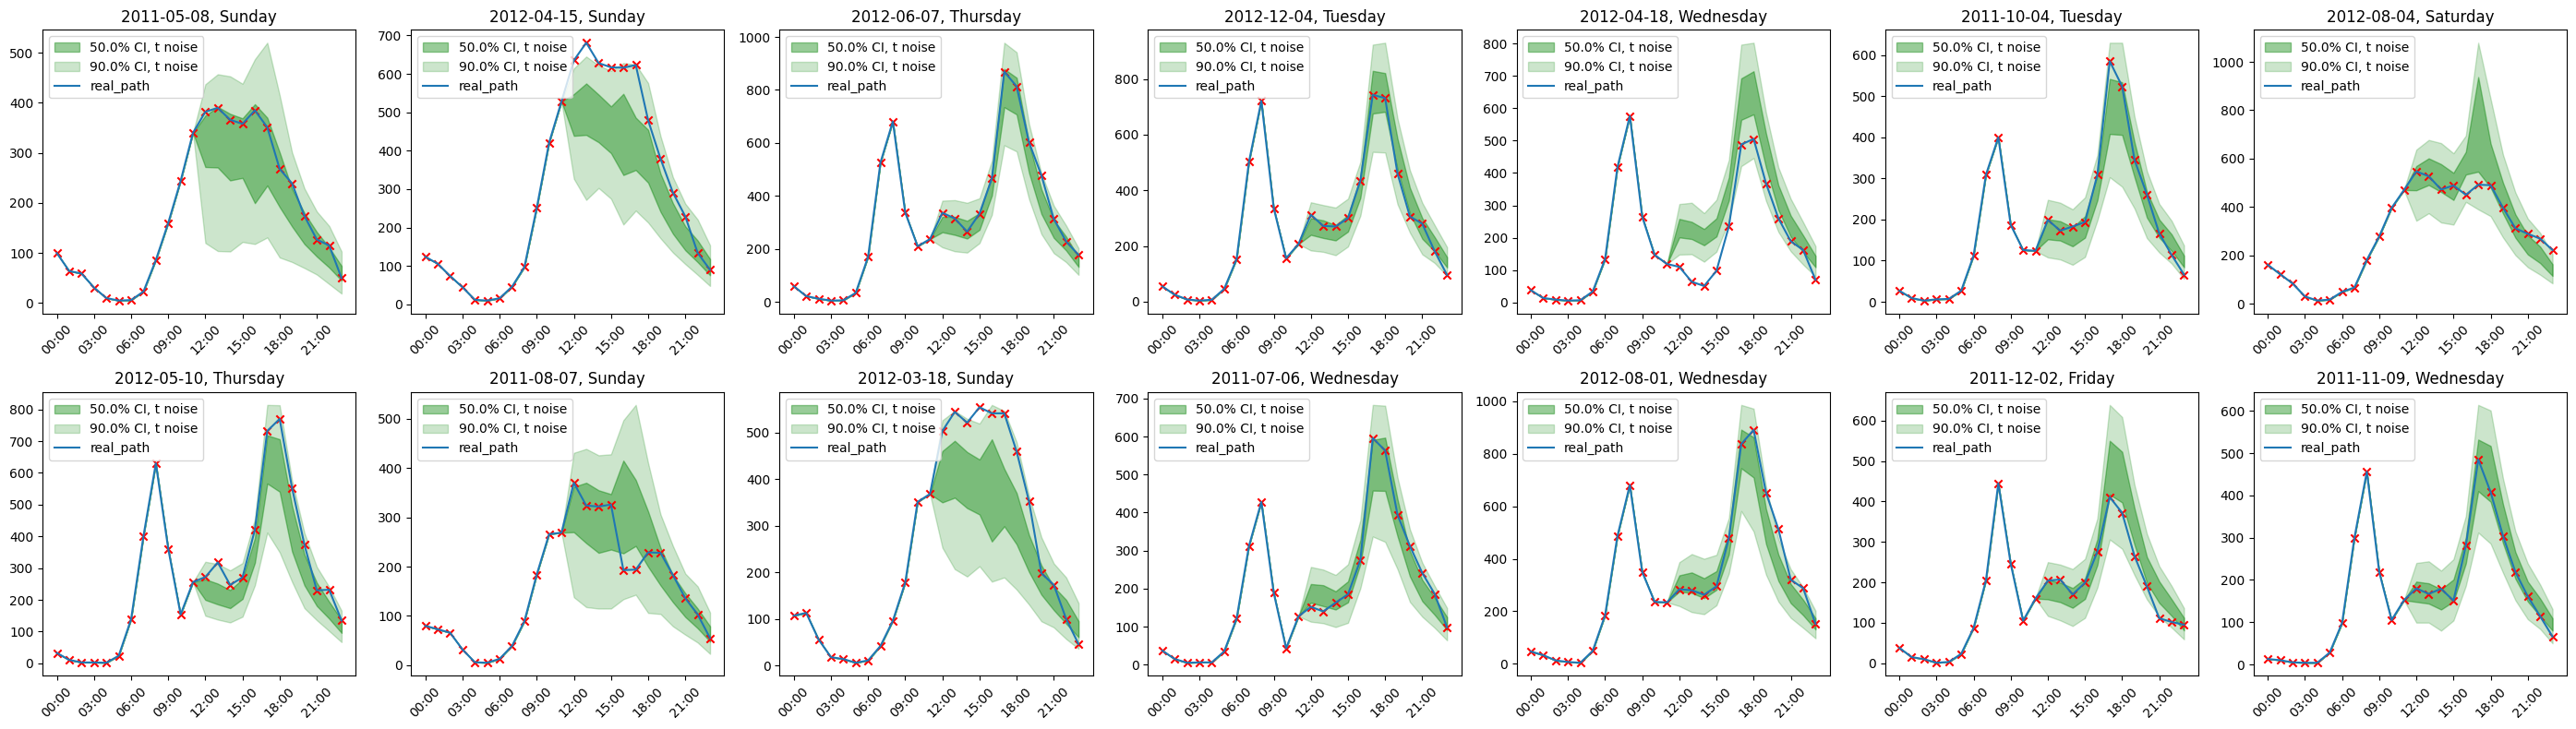

In [48]:
plot_bike_result("SHD (student-t noise)", results_dict)

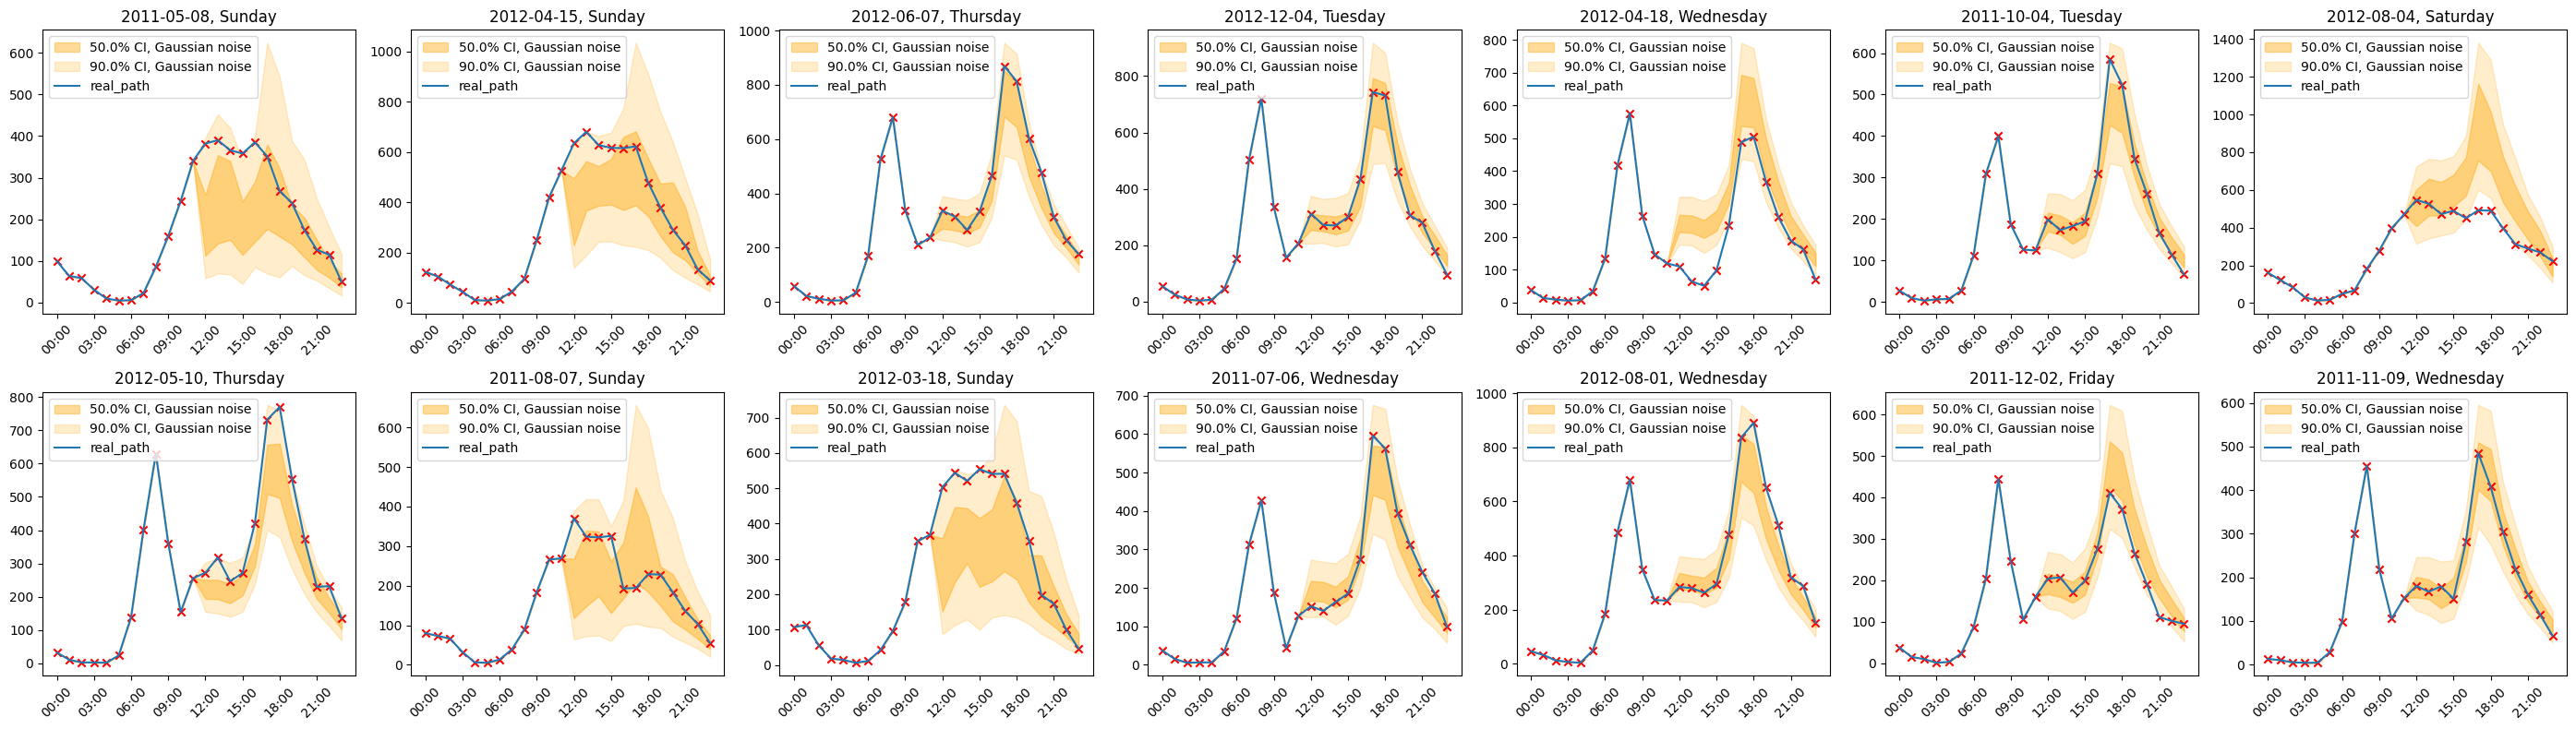

In [49]:
plot_bike_result("SGM (Gaussian noise)", results_dict)

In [50]:
selected_dates = ["2011-10-04", "2012-12-04", "2011-05-08", "2011-08-07"]
selected_results_dict = {}
for key in results_dict.keys():
    selected_results_dict[key] = {k: results_dict[key][k] for k in selected_dates}

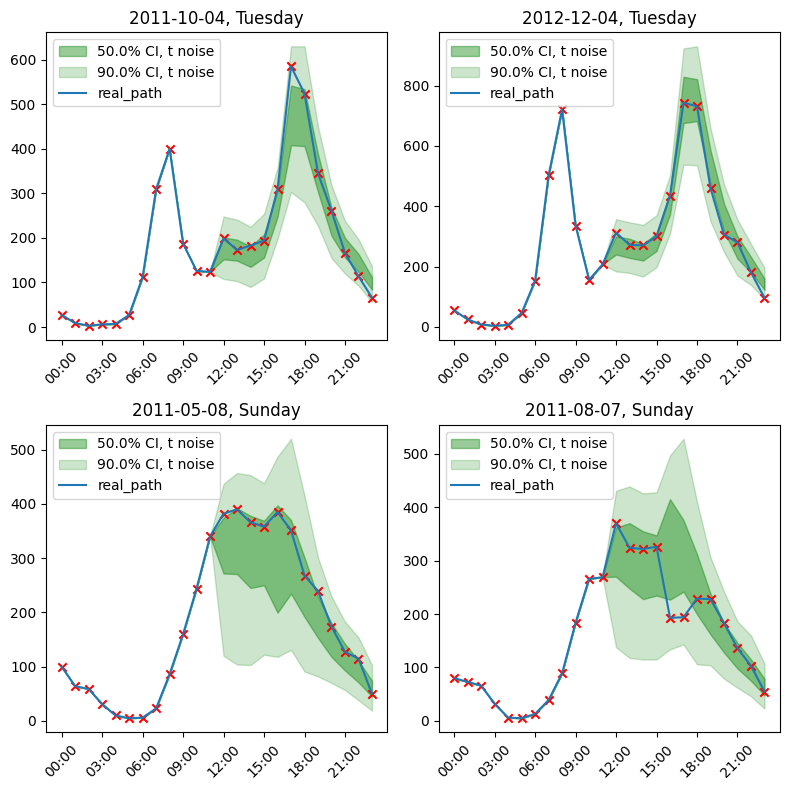

In [51]:
plot_bike_result("SHD (student-t noise)", selected_results_dict)

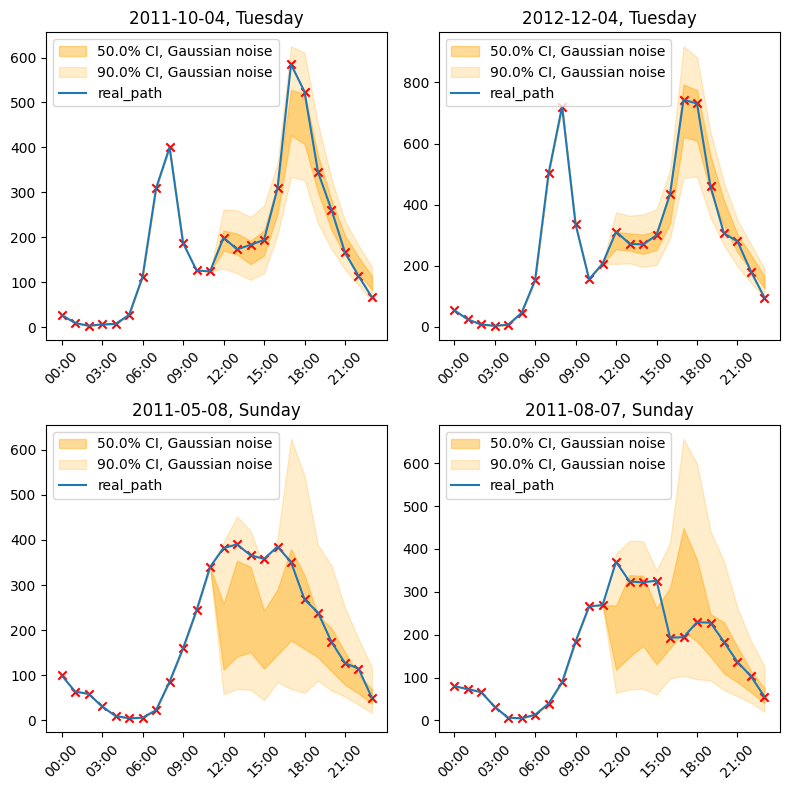

In [52]:
plot_bike_result("SGM (Gaussian noise)", selected_results_dict)

### stock

In [53]:
fake_samples_stock = {}
real_samples_stock, fake_samples_stock["SHD (student-t noise)"] = load_generated_data_diffusion_stock("stock_t")
_, fake_samples_stock["SGM (Gaussian noise)"] = load_generated_data_diffusion_stock("stock_gaussian")

fake_samples_stock["DDPM (Gaussian)"] = np.load("save/baseline_generated_stock/stock_ddpm_gaussian.npy")
fake_samples_stock["LIM"] = np.load("save/baseline_generated_stock/stock_LIM.npy")

In [54]:
def create_portfolio_returns(sample):
    port_return_equal = sample.squeeze().mean(axis=1)
    return {"equally weighted portfolio": port_return_equal}

In [55]:
def calc_W_dist_portfolio(fake_sample, real_sample, plot=False):
    # calculate the return of a equally weighted portfolio
    real_port_return_equal = real_sample.squeeze().mean(axis=1)
    fake_port_return_equal = fake_sample.squeeze().mean(axis=1)
    
    return wasserstein_distance(real_port_return_equal, fake_port_return_equal)

In [56]:
W_dist_dict = calc_and_print_W_dist(fake_samples_stock, real_samples_stock, "plot_result", normalize = True, target_dim = [i for i in range(0,20)], target_L = [0])
for key, value in W_dist_dict.items():
    if "W_dist" in key:
        w_dist_equal = calc_W_dist_portfolio(fake_samples_stock[key.split("_mean_W_dist")[0]], real_samples_stock)
        print(key, value, w_dist_equal)

SHD (student-t noise)_mean_W_dist 0.14077233899153124 0.2847116675826675
SGM (Gaussian noise)_mean_W_dist 0.2234436036431117 0.5864536913127493
DDPM (Gaussian)_mean_W_dist 0.2326048768575668 0.6003201095732457
LIM_mean_W_dist 0.2578694842745486 0.6238980543158174


In [57]:
portfolio_return = {"real":create_portfolio_returns(real_samples_stock)}
for key, value in fake_samples_stock.items():
    if ("SGM" in key or "SHD" in key):
        try:
            portfolio_return[key]=create_portfolio_returns(fake_samples_stock[key])
        except:
            continue

In [58]:
def plot_portfolio_return_density(portfolio_dict, color_list = ["red", "blue", "green"], save_fig=True):
    # format: {<name of model type>:{<portfolio type>: [portfolio returns]}}
    for portfolio_type in portfolio_dict[list(portfolio_dict.keys())[0]].keys():
        plt.figure(figsize=(4, 4))
        col=0
        for model_name in portfolio_dict.keys():
            # plt.hist(portfolio_dict[model_name][portfolio_type], bins=50, density=True, alpha=0.2, color = color_list[col])
            line1=seaborn.kdeplot(portfolio_dict[model_name][portfolio_type],label=model_name, color = color_list[col])
            col=col+1
        plt.legend(fontsize='7')
        plt.title(f"Daily return of {portfolio_type}")
        if save_fig:
            plt.savefig(f'./save/plot_result/stock_density_plot.png')
        plt.show()

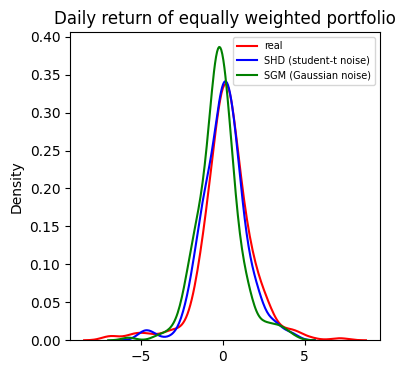

In [59]:
plot_portfolio_return_density(portfolio_return)

In [60]:
fake_portfolio_return = {}
for key in portfolio_return.keys():
    if key == "real":
        real_portfolio_return = portfolio_return[key]["equally weighted portfolio"].reshape(-1,1,1)
    else:
        fake_portfolio_return[key] = portfolio_return[key]["equally weighted portfolio"].reshape(-1,1,1)

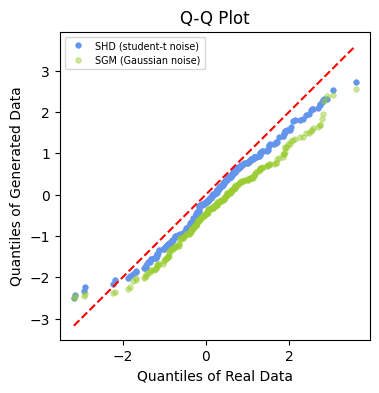

In [61]:
plot_QQ(["SHD (student-t noise)", "SGM (Gaussian noise)"], fake_portfolio_return, real_portfolio_return,\
         "plot_result", "stock", target_dim = [0], target_L = [0], \
            color_lis = ['cornflowerblue', 'yellowgreen'], shape=(1,1), save_fig = True, drop_percentile=5.0)